In [ ]:
!pip install scikit-learn-extra 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd

from sklearn.cluster import AgglomerativeClustering, KMeans, MeanShift, AffinityPropagation, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn_extra.cluster import KMedoids

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data_df = pd.read_csv('/content/drive/MyDrive/ml/Simulated_Data_set_of_Iraqi_tourism_places.csv', sep=';',encoding='latin-1')[:-1]

### Data Set Information:

ID:(int) ,City:(text) Place names(text) Place names(text), Latitude:real Longitude:real
A: Adventure(1 or blank), C: Culture(1 or blank), E: Environmental(1 or blank), H: Health(1 or blank), N: Nature(1 or blank), R: Religious(1 or blank), SP: SPort(1 or blank), SH: SHopping(1 or blank), B: Business(1 or blank), L: leisure(1 or blank)

### Attribute Information:

ID:place identification ,City:the city of plcae, Place names(in arabic) Place names(in english), Latitude:Latitude of place Longitude:Longitude of place
type of intrest represented as:A: Adventure, C: Culture, E: Environmental, H: Health, N: Nature, R: Religious, SP: SPort, SH: SHopping, B: Business, L: leisure

In [ ]:
data_df

,ID,City,Place names,Place names.1,Latitude,Longitude,A,C,E,H,N,R,SP,S H,B,L
0,1,Baghdad,Kadhimiya kindergarten,ÇáÑæÖÉ ÇáßÇÙãíÉ,33.379507,44.339878,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2,Baghdad,the aquatic city,ÇáãÏíäÉ ÇáãÇÆíÉ,33.252217,44.495281,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,3,Baghdad,Mosque and shrine of Imam Abu Hanifa Noman,ÌÇãÚ æãÑÞÏ ÇáÅãÇã ÃÈæ ÍäíÝÉ ÇáäÚãÇä,33.371865,44.358385,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,Baghdad,Bartha Mosque,ÌÇãÚ ÈÑÇËÇ,33.351238,44.361236,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,5,Baghdad,Mosque and shrine of Sheikh Abdul Qadir Kilani,ÌÇãÚ æãÑÞÏ ÇáÔíÎ ÚÈÏ ÇáÞÇÏÑ ÇáßíáÇäí,33.337880,44.410124,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,228,Wasit,Historic City of Wasit,ãÏíäÉ æÇÓØ ÇáÊÇÑíÎíÉ,32.602409,45.752098,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
228,229,Wasit,Corniche El Kout,ßæÑäíÔ ÇáßæÊ,32.506066,45.812689,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0
229,230,Wasit,Grand Mosque of Kut,ÌÇãÚ ÇáßæÊ ÇáßÈíÑ,32.493208,45.828086,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
230,231,Wasit,Al Rihana Park,ãÊäÒå ÇáÑíÍÇäÉ,32.503519,45.816722,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,1.0


In [ ]:
X = data_df[['Latitude', 'Longitude']]
Y = data_df['City']

In [ ]:
Y =  np.array(Y)
y_uniq = np.unique(Y, return_counts=True)
n_clusters = len(y_uniq[0])
y_uniq

(array(['Anbar', 'Arbil', 'Babylon', 'Baghdad', 'Basra', 'Dhi Qar',
        'Diyala', 'Dohuk', 'Karbala', 'Kirkuk', 'Maysan', 'Mosul',
        'Muthanna', 'Najaf', 'Qadisiyah', 'Salahaddin', 'Sulaymaniyah',
        'Wasit'], dtype=object),
 array([ 7, 27, 15, 36, 18,  9, 10, 16,  8,  9,  5, 20,  5, 15,  4,  6, 16,
         6]))

In [ ]:
n_clusters

18

Для аналізу нам даний датасет із 18 кластерами, але так як потрібно дослідити кластеризацію для різного числа кластерів від 2 до 5 то для цього створимо різні датасети для виконання потрібної умови.

In [ ]:
x_2 = data_df.loc[data_df['City'].isin(['Arbil', 'Baghdad'])]
x_2

,ID,City,Place names,Place names.1,Latitude,Longitude,A,C,E,H,N,R,SP,S H,B,L
0,1,Baghdad,Kadhimiya kindergarten,ÇáÑæÖÉ ÇáßÇÙãíÉ,33.379507,44.339878,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
1,2,Baghdad,the aquatic city,ÇáãÏíäÉ ÇáãÇÆíÉ,33.252217,44.495281,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,3,Baghdad,Mosque and shrine of Imam Abu Hanifa Noman,ÌÇãÚ æãÑÞÏ ÇáÅãÇã ÃÈæ ÍäíÝÉ ÇáäÚãÇä,33.371865,44.358385,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,Baghdad,Bartha Mosque,ÌÇãÚ ÈÑÇËÇ,33.351238,44.361236,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
4,5,Baghdad,Mosque and shrine of Sheikh Abdul Qadir Kilani,ÌÇãÚ æãÑÞÏ ÇáÔíÎ ÚÈÏ ÇáÞÇÏÑ ÇáßíáÇäí,33.337880,44.410124,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,95,Arbil,Magdy Mall,ãÇÌÏí ãæá,36.209606,44.044718,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
95,96,Arbil,Holler Mall,åæáíÑ ãæá,36.196740,44.017722,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
96,97,Arbil,Rhine Mall,ÑÇíä ãæá,36.180237,44.014354,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0
97,98,Arbil,city ??center,ÓÊí ÓäÊÑ,36.180418,44.024444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0


In [ ]:
Y_2 = np.array(x_2['City'])
x_2 = x_2[['Latitude', 'Longitude']]

Аналогічно створимо датасети із 3, 4 та 5 кластерами

In [ ]:
x_3 = data_df.loc[data_df['City'].isin(['Arbil', 'Baghdad', 'Mosul'])]
Y_3 = np.array(x_3['City'])
x_3 = x_3[['Latitude', 'Longitude']]

x_4 = data_df.loc[data_df['City'].isin(['Arbil', 'Baghdad', 'Mosul', 'Basra'])]
Y_4 = np.array(x_4['City'])
x_4 = x_4[['Latitude', 'Longitude']]

x_5 = data_df.loc[data_df['City'].isin(['Arbil', 'Baghdad', 'Mosul', 'Basra', 'Sulaymaniyah'])]

Y_5 = np.array(x_5['City'])
x_5 = x_5[['Latitude', 'Longitude']]

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
y_2 = ordinal_encoder.fit_transform(Y_2.reshape(-1,1)).reshape(1,-1)[0]
y_3 = ordinal_encoder.fit_transform(Y_3.reshape(-1,1)).reshape(1,-1)[0]
y_4 = ordinal_encoder.fit_transform(Y_4.reshape(-1,1)).reshape(1,-1)[0]
y_5 = ordinal_encoder.fit_transform(Y_5.reshape(-1,1)).reshape(1,-1)[0]

In [ ]:
y_5

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 4., 4.,
       4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.])

In [ ]:
def visualization(X, y):
    scatter = plt.scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y, label=y)
    plt.legend(*scatter.legend_elements(), title="Clusters")
    plt.show()


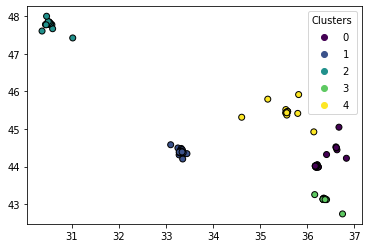

In [ ]:
visualization(x_5, y_5)

In [ ]:
from sklearn import metrics

def df_metrics(y_true, y_pred):
  ars = metrics.cluster.adjusted_rand_score(y_true, y_pred)
  ami = metrics.adjusted_mutual_info_score(y_true, y_pred)
  vms = metrics.v_measure_score(y_true, y_pred)
  cs = metrics.completeness_score(y_true, y_pred)
  fms = metrics.fowlkes_mallows_score(y_true, y_pred)
  ps = metrics.precision_score(y_true, y_pred, average='micro')
  r = metrics.recall_score(y_true, y_pred, average='micro')
  f1 = metrics.f1_score(y_true, y_pred, average='micro')


  return {'adjusted_rand_index': ars,
          'adjusted_mutual_info': ami,
          'v_measure_score': vms,
          'completeness_score': cs,
          'fowlkes_mallows_score': fms,
          'precision_score': ps,
          'recall': r,
          'f1': f1}

### AgglomerativeClustering

In [ ]:
def agglo_claster(X, n_cluster, linkage):
  m = AgglomerativeClustering(n_clusters=n_cluster, linkage=linkage).fit(X)
  y_label = m.labels_

  return y_label

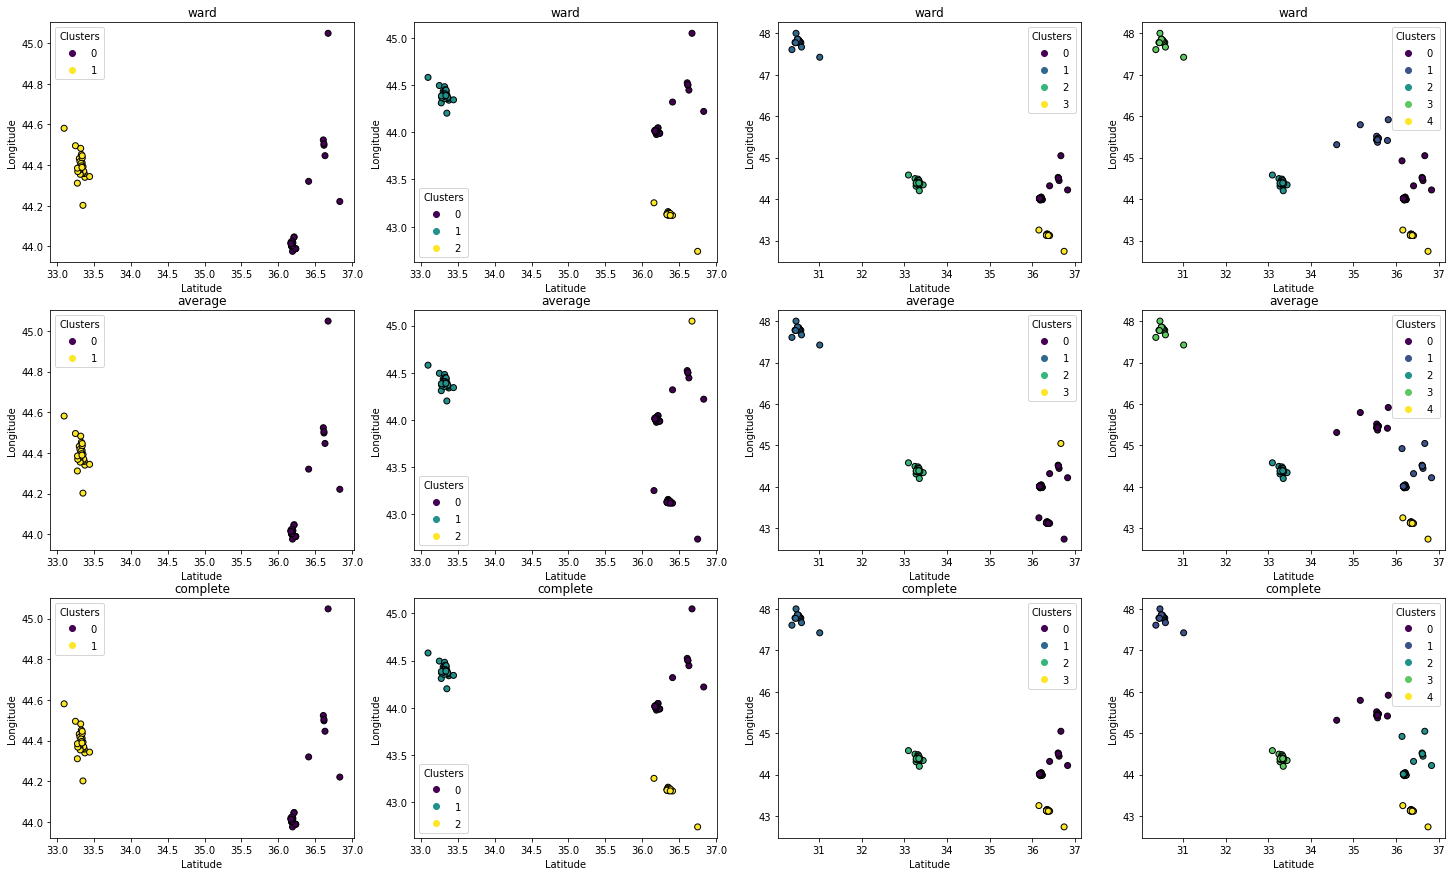

In [ ]:
n_clusters = [2, 3, 4, 5]
x_n = [x_2, x_3, x_4, x_5]
y_n = [y_2, y_3, y_4, y_5]
linkage = ['ward', "average", "complete"]
agglo_res = pd.DataFrame()

fig, ax = plt.subplots(3, 4, figsize=(25, 15))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
  for j, l in enumerate(linkage):
    y_pred = agglo_claster(X, n, l)
    
    scatter = ax[j, i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[j, i].legend(*scatter.legend_elements(), title="Clusters")
    ax[j, i].set(xlabel='Latitude', ylabel='Longitude', title=l)

    metric_res = df_metrics(y, y_pred)
    agglo_res[f'Agglomerative: {n}, {l}'] = pd.Series(metric_res)

plt.show()

In [ ]:
agglo_res

,"Agglomerative: 2, ward","Agglomerative: 2, average","Agglomerative: 2, complete","Agglomerative: 3, ward","Agglomerative: 3, average","Agglomerative: 3, complete","Agglomerative: 4, ward","Agglomerative: 4, average","Agglomerative: 4, complete","Agglomerative: 5, ward","Agglomerative: 5, average","Agglomerative: 5, complete"
adjusted_rand_index,1.0,1.0,1.0,1.0,0.676946,1.0,1.000000,0.750539,1.000000,0.981582,0.981582,0.981582
adjusted_mutual_info,1.0,1.0,1.0,1.0,0.755461,1.0,1.000000,0.848513,1.000000,0.976837,0.976837,0.976837
v_measure_score,1.0,1.0,1.0,1.0,0.762321,1.0,1.000000,0.854102,1.000000,0.977943,0.977943,0.977943
completeness_score,1.0,1.0,1.0,1.0,0.930611,1.0,1.000000,0.960752,1.000000,0.979481,0.979481,0.979481
fowlkes_mallows_score,1.0,1.0,1.0,1.0,0.820011,1.0,1.000000,0.836631,1.000000,0.985526,0.985526,0.985526
precision_score,1.0,1.0,1.0,1.0,0.746988,1.0,0.465347,0.257426,0.465347,0.230769,0.000000,0.000000
recall,1.0,1.0,1.0,1.0,0.746988,1.0,0.465347,0.257426,0.465347,0.230769,0.000000,0.000000
f1,1.0,1.0,1.0,1.0,0.746988,1.0,0.465347,0.257426,0.465347,0.230769,0.000000,0.000000


Отже, як бачимо із отриманих результатів, що найкращий із отриманих прогнозів є результат для AgglomerativeСuster із параметром ward.


### KMeans

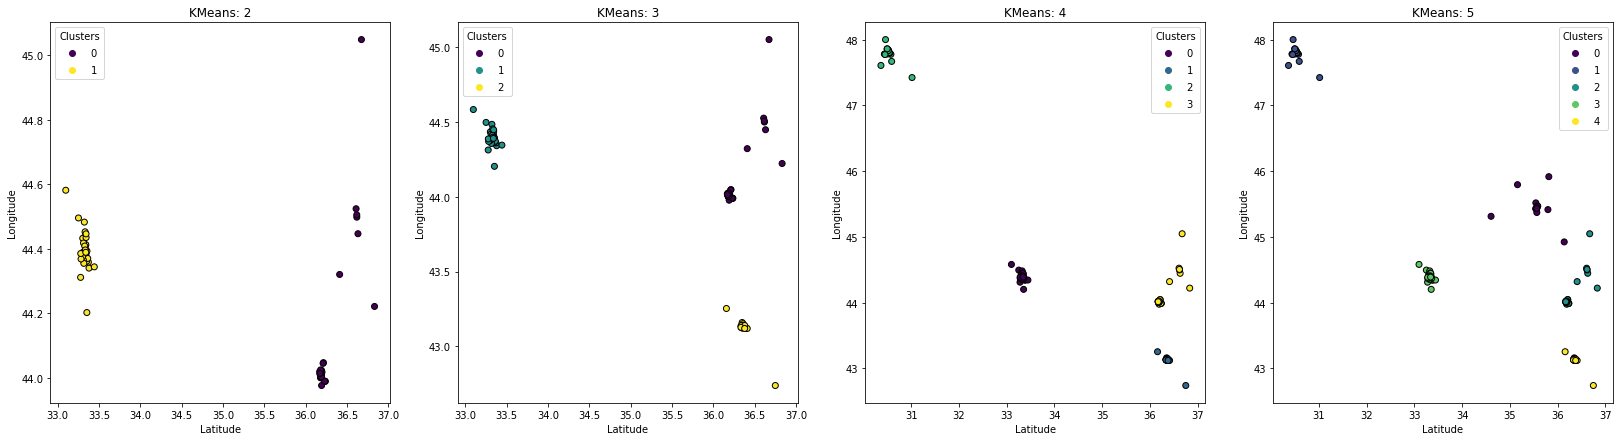

,KMeans: 2,KMeans: 3,KMeans: 4,KMeans: 5
adjusted_rand_index,1.0,1.0,1.000000,1.0
adjusted_mutual_info,1.0,1.0,1.000000,1.0
v_measure_score,1.0,1.0,1.000000,1.0
completeness_score,1.0,1.0,1.000000,1.0
fowlkes_mallows_score,1.0,1.0,1.000000,1.0
precision_score,1.0,1.0,0.178218,0.0
recall,1.0,1.0,0.178218,0.0
f1,1.0,1.0,0.178218,0.0


In [ ]:
kmeans_res = pd.DataFrame()
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
    model = KMeans(n_clusters=n).fit(X)
    y_pred = model.labels_
    
    scatter = ax[i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set(xlabel='Latitude', ylabel='Longitude', title=f'KMeans: {n}')

    metric_res = df_metrics(y, y_pred)
    kmeans_res[f'KMeans: {n}'] = pd.Series(metric_res)

plt.show()
kmeans_res

Для метода KMeans бачимо, що результат є дуже хорошим не зважаючи на кількість кластерів.

### KMedoids

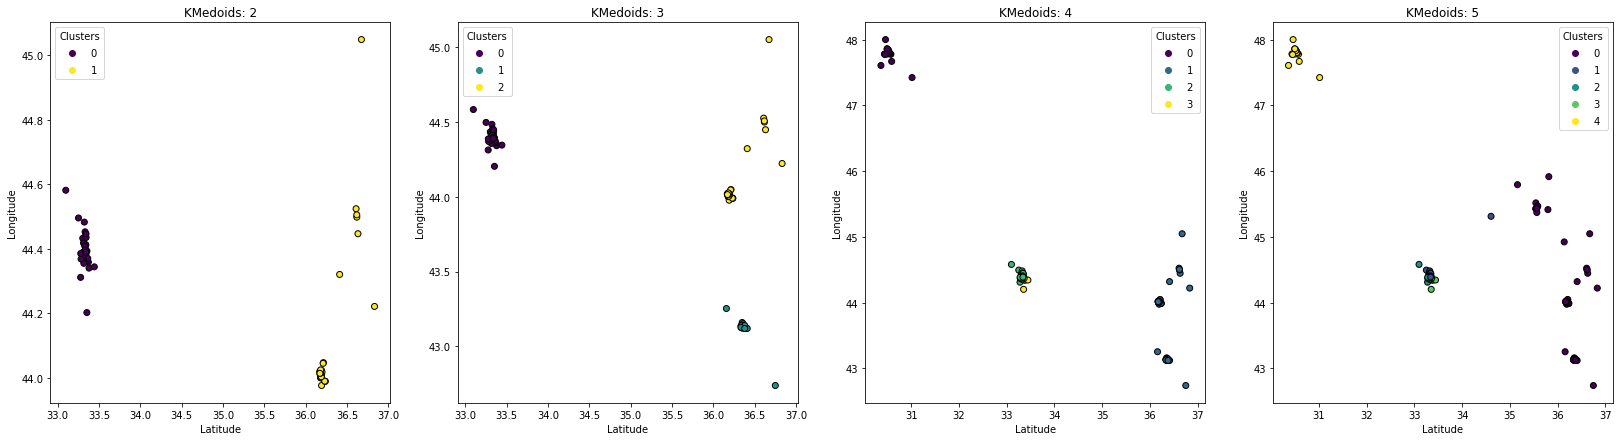

,KMedoids: 2,KMedoids: 3,KMedoids: 4,KMedoids: 5
adjusted_rand_index,1.0,1.0,0.661174,0.401414
adjusted_mutual_info,1.0,1.0,0.804204,0.653882
v_measure_score,1.0,1.0,0.811829,0.672770
completeness_score,1.0,1.0,0.865233,0.742294
fowlkes_mallows_score,1.0,1.0,0.766145,0.573866
precision_score,0.0,0.0,0.000000,0.401709
recall,0.0,0.0,0.000000,0.401709
f1,0.0,0.0,0.000000,0.401709


In [ ]:
kmedoids_res = pd.DataFrame()
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
    model = KMedoids(n_clusters=n).fit(X)
    y_pred = model.labels_
    
    scatter = ax[i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set(xlabel='Latitude', ylabel='Longitude', title=f'KMedoids: {n}')

    metric_res = df_metrics(y, y_pred)
    kmedoids_res[f'KMedoids: {n}'] = pd.Series(metric_res)

plt.show()
kmedoids_res

Алгоритм KMedoids краще працює з даними, коли потрібно кластеризувати дані з меншою кількістю даних.

### MeanShift

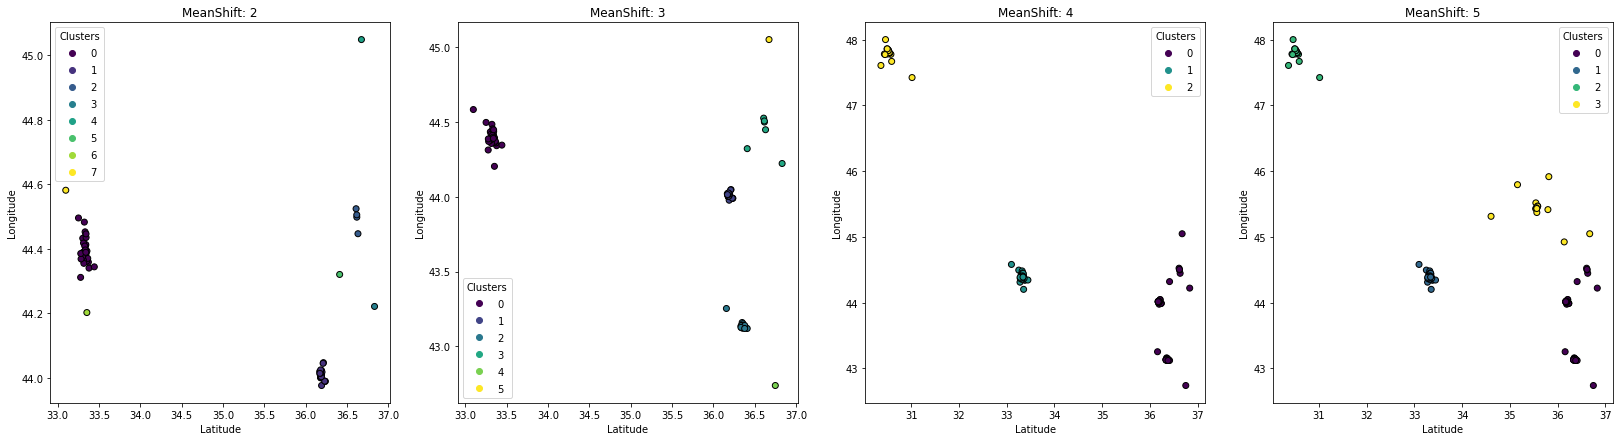

,MeanShift: 2,MeanShift: 3,MeanShift: 4,MeanShift: 5
adjusted_rand_index,0.770847,0.888863,0.755722,0.781017
adjusted_mutual_info,0.701999,0.882107,0.863020,0.877016
v_measure_score,0.725001,0.888538,0.866621,0.881780
completeness_score,0.568628,0.799431,1.000000,0.971835
fowlkes_mallows_score,0.878443,0.926874,0.842793,0.844171
precision_score,0.000000,0.228916,0.801980,0.683761
recall,0.000000,0.228916,0.801980,0.683761
f1,0.000000,0.228916,0.801980,0.683761


In [ ]:
meanshift_res = pd.DataFrame()
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
    model = MeanShift().fit(X)
    y_pred = model.labels_
    
    scatter = ax[i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set(xlabel='Latitude', ylabel='Longitude', title=f'MeanShift: {n}')

    metric_res = df_metrics(y, y_pred)
    meanshift_res[f'MeanShift: {n}'] = pd.Series(metric_res)

plt.show()
meanshift_res

MeanShift не показав хороші результати. Тим більш при малій кількості кластерів алгоритм невдало визначив і саму кількість кластерів.

### GaussianMixture

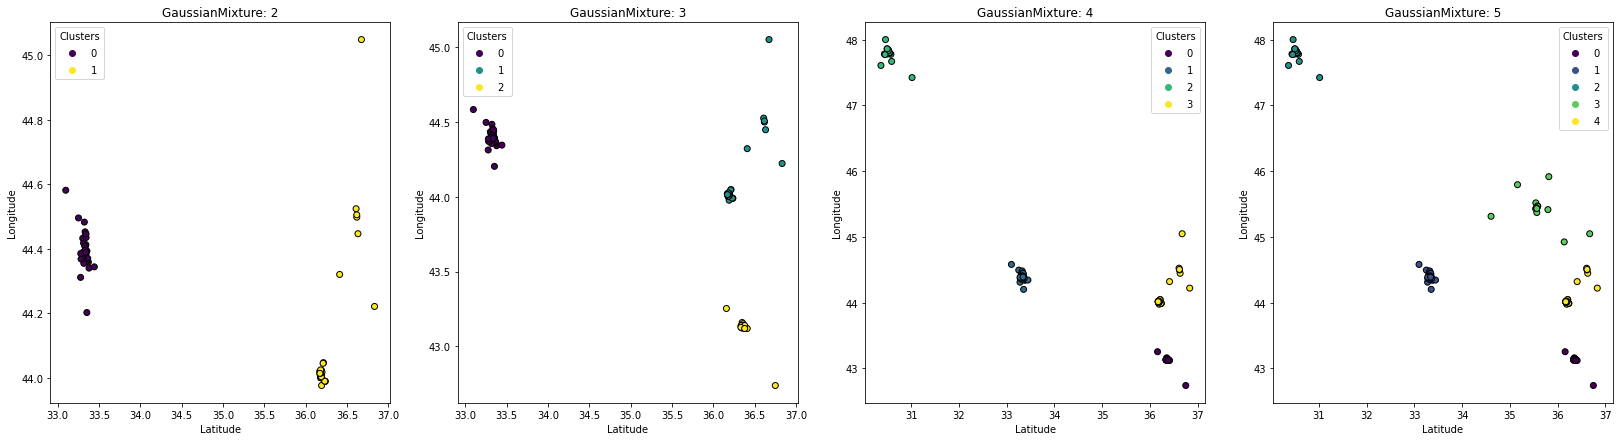

,GaussianMixture: 2,GaussianMixture: 3,GaussianMixture: 4,GaussianMixture: 5
adjusted_rand_index,1.0,1.000000,1.000000,0.981479
adjusted_mutual_info,1.0,1.000000,1.000000,0.976836
v_measure_score,1.0,1.000000,1.000000,0.977936
completeness_score,1.0,1.000000,1.000000,0.976673
fowlkes_mallows_score,1.0,1.000000,1.000000,0.985412
precision_score,0.0,0.240964,0.534653,0.461538
recall,0.0,0.240964,0.534653,0.461538
f1,0.0,0.240964,0.534653,0.461538


In [ ]:
gausmix_res = pd.DataFrame()
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
    model = GaussianMixture(n_components=n).fit(X)
    y_pred = model.predict(X)
    
    scatter = ax[i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set(xlabel='Latitude', ylabel='Longitude', title=f'GaussianMixture: {n}')

    metric_res = df_metrics(y, y_pred)
    gausmix_res[f'GaussianMixture: {n}'] = pd.Series(metric_res)

plt.show()
gausmix_res

GaussianMixture також показав себе дуже добре. Є одиничні похибки у кластеризації при розпізнавання 5 кластерів.

### AffinityPropagation

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_affinity_propagation.py:253: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  ConvergenceWarning,


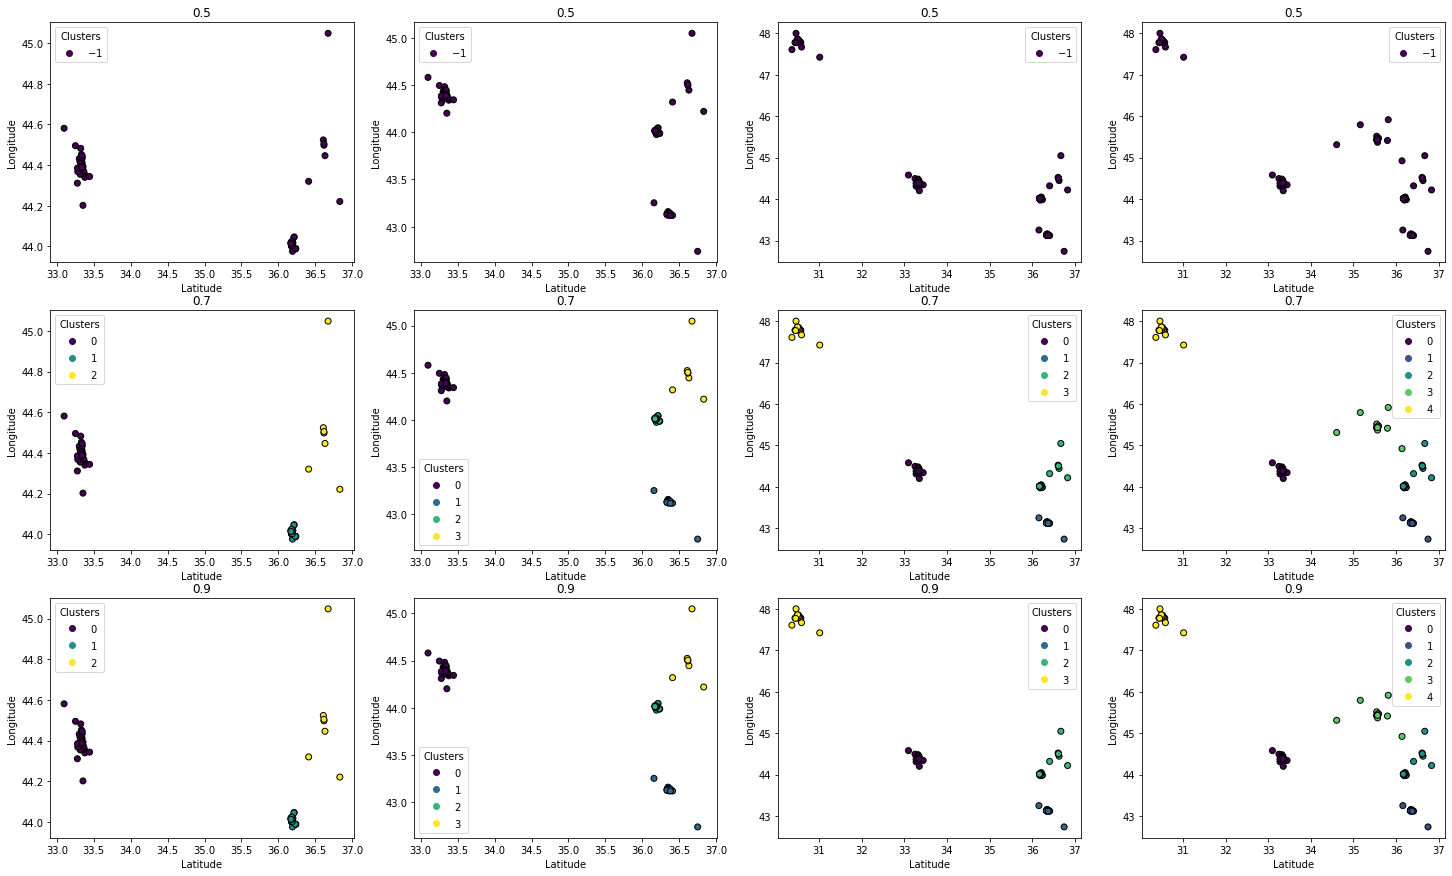

,"AffinityPropagation: 2, 0.5","AffinityPropagation: 2, 0.7","AffinityPropagation: 2, 0.9","AffinityPropagation: 3, 0.5","AffinityPropagation: 3, 0.7","AffinityPropagation: 3, 0.9","AffinityPropagation: 4, 0.5","AffinityPropagation: 4, 0.7","AffinityPropagation: 4, 0.9","AffinityPropagation: 5, 0.5","AffinityPropagation: 5, 0.7","AffinityPropagation: 5, 0.9"
adjusted_rand_index,0.000000,0.856722,0.856722,0.000000e+00,0.906194,0.906194,0.000000e+00,1.0,1.0,0.000000e+00,1.0,1.0
adjusted_mutual_info,0.000000,0.844495,0.844495,6.247397e-18,0.917213,0.917213,-2.608615e-16,1.0,1.0,5.463776e-18,1.0,1.0
v_measure_score,0.000000,0.847765,0.847765,7.259475e-16,0.920007,0.920007,0.000000e+00,1.0,1.0,3.551455e-16,1.0,1.0
completeness_score,1.000000,0.735757,0.735757,1.000000e+00,0.851864,0.851864,1.000000e+00,1.0,1.0,1.000000e+00,1.0,1.0
fowlkes_mallows_score,0.708734,0.925899,0.925899,5.866073e-01,0.938320,0.938320,5.120334e-01,1.0,1.0,4.612928e-01,1.0,1.0
precision_score,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0
recall,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0
f1,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.0,0.0,0.000000e+00,0.0,0.0


In [ ]:
affiprop_res = pd.DataFrame()
damping_range = [0.5,0.7,0.9]

fig, ax = plt.subplots(3, 4, figsize=(25, 15))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
  for j, d in enumerate(damping_range):
    model = AffinityPropagation(damping=d).fit(X)
    y_pred = model.labels_
    
    scatter = ax[j, i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[j, i].legend(*scatter.legend_elements(), title="Clusters")
    ax[j, i].set(xlabel='Latitude', ylabel='Longitude', title=d)

    metric_res = df_metrics(y, y_pred)
    affiprop_res[f'AffinityPropagation: {n}, {d}'] = pd.Series(metric_res)

plt.show()
affiprop_res

AffinityPropagation показала дуже хороші результати для числа кластерів 4 і 5 із параметрами damping_range 0.7 і 0.9.

### SpectralClustering

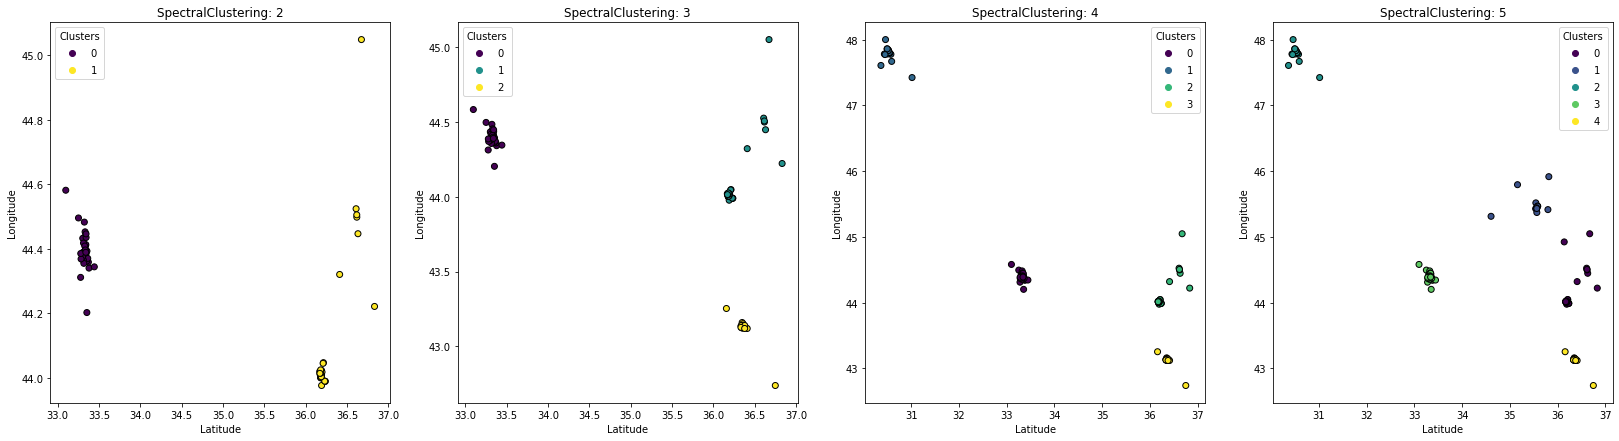

,SpectralClustering: 2,SpectralClustering: 3,SpectralClustering: 4,SpectralClustering: 5
adjusted_rand_index,1.0,1.000000,1.00000,0.981582
adjusted_mutual_info,1.0,1.000000,1.00000,0.976837
v_measure_score,1.0,1.000000,1.00000,0.977943
completeness_score,1.0,1.000000,1.00000,0.979481
fowlkes_mallows_score,1.0,1.000000,1.00000,0.985526
precision_score,0.0,0.240964,0.19802,0.384615
recall,0.0,0.240964,0.19802,0.384615
f1,0.0,0.240964,0.19802,0.384615


In [ ]:
spectral_res = pd.DataFrame()
fig, ax = plt.subplots(1, 4, figsize=(28, 7))

for i, (n, X, y) in enumerate(zip(n_clusters, x_n, y_n)):
    model = SpectralClustering(n_clusters=n).fit(X)
    y_pred = model.labels_
    
    scatter = ax[i].scatter(X['Latitude'], X['Longitude'], edgecolor="k", c=y_pred, label=y_pred)
    
    ax[i].legend(*scatter.legend_elements(), title="Clusters")
    ax[i].set(xlabel='Latitude', ylabel='Longitude', title=f'SpectralClustering: {n}')

    metric_res = df_metrics(y, y_pred)
    spectral_res[f'SpectralClustering: {n}'] = pd.Series(metric_res)

plt.show()
spectral_res

SpectralClustering має одиничні похибки при розпізнаванні 5 кластерів.

### Висновок

Отож із отриманих результатів робимо висновок, що найкращий результат отримали при роботі метода KMeans. Це можна пояснити тим, що даний алгоритм кластеризує дані, намагаючись розділити вибірки в n групи рівної дисперсії, а так як наші Х це координати популярни місць які відносяться до Y міст. І відповідно відстань від координатами в середині міста є значно меншою ніж відстанб від самих міст. Саме це і сприяє такому доброму результату кластеризації алгоритмом KMeans.